# U.S. Medical Insurance Costs

# Overview
In this project, I will analyze the medical insurance data of over 50000 people. The question I want to answer is:...

In [1]:
import csv
import json

insurance_dict = {}
with open("insurance.csv", "r") as insurance_file:
    insurance_csv = csv.DictReader(insurance_file)
    index = 0
    for person in insurance_csv:
        insurance_dict[index] = person 
        index += 1

# First person in the insurance dict:
print(insurance_dict[0])

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}


In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def invalid_attribute_message(attribute:str):
    """ This function provides an error message when an attribute is invalid
    """
    print(str(attribute) + " is not a valid attribute. Check for correct spelling.")
    print("The valid attributes are : ")
    for key in insurance_dict[0].keys():
            print("- " + key)

In [4]:
def get_list_of_attribute(attribute:str)-> list:
    """ This function takes all the values associated with a given key (attribute) and appends them to a list.
    """
    attr_list : list = []
    try:
        for value in insurance_dict.values():
            attr_list.append(value[attribute.lower().strip()])
        return attr_list
    except:
        invalid_attribute_message(attribute)
# Example of invalid attribute
get_list_of_attribute("Name")

Name is not a valid attribute. Check for correct spelling.
The valid attributes are : 
- age
- sex
- bmi
- children
- smoker
- region
- charges


In [5]:
def get_count_of_attribute(attribute:str)-> dict:
    """ This function allows for the count of different attributes to be constructed as a dict.
    """
    attribute_dict = {}
    try:
        for value in insurance_dict.values():
            attribute_dict[value[attribute]] = attribute_dict.get(value[attribute], 0) + 1
        return attribute_dict
    except:
        invalid_attribute_message(attribute)

# Examples
print(get_count_of_attribute("region"))
print(get_count_of_attribute("sex"))
print(get_count_of_attribute("smoker"))

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}
{'female': 662, 'male': 676}
{'yes': 274, 'no': 1064}


# Understanding potential biases and weaknesses of the dataset
When conducting analyses on a given dataset, it is essential to fully understand the scope of the data. Are there any factors that could **skew** the results?

In order to tackle this issue, I will first get an intuitive understanding of the set through various figures and diagrams. Later on, I will examine the data using statistical techniques.

In [51]:
def attribute_piechart(attributes):
    
    attributes = [attributes] if type(attributes) == str else attributes
    categories_of_attributes = []
    categories_data = []
    try:
        for attribute in attributes:
                categories_of_attributes.append(get_count_of_attribute(attribute.lower()).keys())
                categories_data.append(get_count_of_attribute(attribute.lower()).values())
    except:
        return
    # Create plot
    fig, axs = plt.subplots(1, len(attributes), figsize = (9, 3), sharey=True)
    for i in range(len(attributes)):
        ax = axs[i] if len(attributes) > 1 else axs
        ax.pie(categories_data[i], labels = categories_of_attributes[i])
        ax.set_title("Distribution of data within " + str(attributes[i]))
    # Show plot
    plt.show()

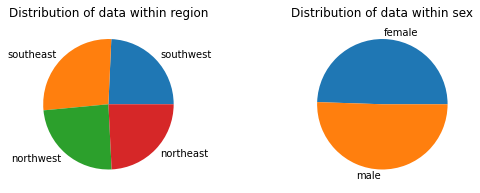

In [54]:
attributes = ["region", "sex"]
attribute_piechart(attributes)

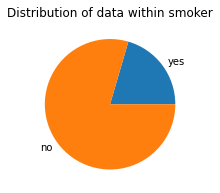

In [55]:
attribute_piechart("smoker")

In [ ]:
# Could create a scale in order to categorize the different insurance costs
insurance_scale = {0 : 0,
                  1 : 1000
                  2 : 5000
                  3 : 10000
                  4 : 20000}